<a href="https://colab.research.google.com/github/SatyaPraveenKumarreddyYalla/Mall_segmentation/blob/main/MallCustomer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Liberies/Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots as msp
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import discriminant_analysis as DCA
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#Data _Processing

In [ ]:
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()
df.dtypes
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
le = LabelEncoder()
df1 = df.copy()
df1['Gender'] = le.fit_transform(df1['Gender'])
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#Cluster_Processing

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=48)
kmeans.fit(df1)
y_pred = kmeans.predict(df1)
print(y_pred)

[5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5
 0 5 0 5 0 6 6 5 6 6 6 6 6 6 6 6 2 6 6 6 2 6 2 2 6 2 2 2 6 6 2 6 6 2 2 2 2
 2 6 2 2 6 2 2 2 2 2 7 2 2 7 7 2 2 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 1 7 1 3 1 7 1 7 1 7 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


In [ ]:
initial = []
for k in range(1,len(df1)):
  km = KMeans(n_clusters=k, random_state=48)
  km.fit(df1)
  initial.append(km.inertia_)
fig = px.line(x=range(1,len(df1)), y=initial)
fig.update_layout(
    title="Elbow Method",
    xaxis_title="Number of Clusters",
    yaxis_title="Inertia"
)
fig.show()

In [ ]:
intial1 = []
for k in range(2,len(df1)):
  km = KMeans(n_clusters=k, random_state=48)
  km.fit(df1)
  intial1.append(silhouette_score(df1, km.labels_))

fig = px.line(x=range(2,len(df1)), y=intial1)
fig.update_layout(
    title="Silhouette Method",
    xaxis_title="Number of Clusters",
    yaxis_title="Silhouette Score"
)
fig.show()

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
fig = px.scatter(X, x='Annual Income (k$)', y='Spending Score (1-100)', title='Mall Customer Data')
fig.show()
optimal_k = 24
kmeans = KMeans(n_clusters=optimal_k, random_state=48, n_init=24)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Cluster',
                 title=f'K-Means Clustering with K={optimal_k}',
                 color_continuous_scale='viridis')
fig.update_layout(
    xaxis_title='Annual Income (k$)',
    yaxis_title='Spending Score (1-100)'
)
fig.update_traces(marker=dict(size=8), selector=dict(mode='markers',
  ))
fig.show()
optimal_k = 24
kmeans = KMeans(n_clusters=optimal_k, random_state=48, n_init=24)
kmeans.fit(X)
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg}")

Silhouette Score for K=24: 0.4124528517145907


In [ ]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=2) # Changed n_components to 2
x_pca = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2']) # Changed column names
pca_df

,PC1,PC2
0,-1.537109,-0.922207
1,-0.384168,-2.075149
2,-2.416002,0.010665
3,-0.466982,-1.938355
4,-1.455678,-0.895678
...,...,...
195,2.394866,0.813689
196,1.156805,2.375629
197,2.419550,1.112883
198,1.179183,2.947027


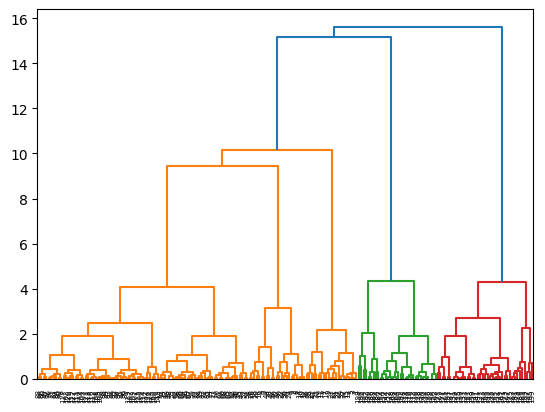

In [ ]:
linked = linkage(x_scaled, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
fig = px.bar(x=range(1,len(df1)), y=initial)
fig.update_layout(
    title="Elbow Method",
    xaxis_title="Number of Clusters",
    yaxis_title="Inertia"
)
fig.show()

In [ ]:
labels = fcluster(linked, t=24, criterion='maxclust')
df['Cluster'] = labels

fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Cluster',
                 title=f'K-Means Clustering with K={optimal_k}',
                 color_continuous_scale='viridis',
                 hover_data=['Gender']) # Moved hover_data here and corrected format

fig.update_layout(
    xaxis_title='Annual Income (k$)',
    yaxis_title='Spending Score (1-100)'
)
fig.update_traces(marker=dict(size=8), selector=dict(mode='markers',
  ))
fig.show()

In [ ]:
from sklearn.metrics import silhouette_score
score_hierarchical = silhouette_score(x_scaled, labels)
print("Silhouette Score (Hierarchical, k=24):", score_hierarchical)


Silhouette Score (Hierarchical, k=24): 0.4194939063491876
